# INFO 7930 Assignment 3 - Linear Models
#### Due Tuesday, October 23 2018
Submission: Put the data and Jupyter notebook files in a folder. Make sure all links to data are relative to the folder so the TAs can run the notebooks.

Find a public dataset with a least 9 columns and 3000 rows. You must post your dataset on the class piazza and get an OK before using it as every student needs to use a different dataset.

## Melbourne, Australia Housing Market

#### Importing Libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import mpl_toolkits
import seaborn as sns


## Data Clearing

#### Selecting & Cleaning Data

In [16]:
data = pd.read_csv('Melbourne_housing_FULL.csv')

In [17]:
data.shape

(34857, 21)

In [18]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [19]:
data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,24/02/2018,6.3,3013.0,...,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


In [20]:
data.drop(['Method', 'SellerG', 'Date', 'Distance', 'Propertycount'], axis=1, inplace=True) # Dropping unnecessary columns

In [21]:
#lets see if there are any columns with missing values 
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

Price            7610
Postcode            1
Bedroom2         8217
Bathroom         8226
Car              8728
Landsize        11810
BuildingArea    21115
YearBuilt       19306
CouncilArea         3
Lattitude        7976
Longtitude       7976
Regionname          3
dtype: int64

In [22]:
# Ratio of missing data to number of data points available. 
# Required to Identify importance of keeping Column or dropping it.

data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(22)

,Missing Ratio
BuildingArea,60.576068
YearBuilt,55.386293
Landsize,33.881286
Car,25.039447
Bathroom,23.599277
Bedroom2,23.573457
Longtitude,22.882061
Lattitude,22.882061
Price,21.832057
Regionname,0.008607


In [23]:
data.dropna(subset=['BuildingArea', 'Landsize'], how='any', inplace=True)
data.dropna(subset=['Price'], how='all', inplace=True)

In [24]:
data.shape

(9382, 16)

In [25]:
data["Suburb"] = data["Suburb"].fillna("None")
data["Address"] = data["Address"].fillna("None")
data["Type"] = data["Type"].fillna("None")
data["Regionname"] = data["Regionname"].fillna("None")
data["CouncilArea"] = data["CouncilArea"].fillna("None")
data["Postcode"] = data["Postcode"].fillna("None")
data["Bathroom"] = data["Bathroom"].fillna(0)
data["Car"] = data["Car"].fillna(0)
data["Bedroom2"] = data["Bedroom2"].fillna(0)
data["Longtitude"] = data["Longtitude"].fillna("None")
data["Lattitude"] = data["Lattitude"].fillna(0)
data["YearBuilt"] = data["YearBuilt"].fillna("None")

# Columns that can be set with a 'None' value inplace of missing value

In [26]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio


In [27]:
data.head()

,Suburb,Address,Rooms,Type,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,3067.0,2.0,1.0,0.0,156.0,79.0,1900,Yarra City Council,-37.8079,144.993,Northern Metropolitan
4,Abbotsford,5 Charles St,3,h,1465000.0,3067.0,3.0,2.0,0.0,134.0,150.0,1900,Yarra City Council,-37.8093,144.994,Northern Metropolitan
6,Abbotsford,55a Park St,4,h,1600000.0,3067.0,3.0,1.0,2.0,120.0,142.0,2014,Yarra City Council,-37.8072,144.994,Northern Metropolitan
11,Abbotsford,124 Yarra St,3,h,1876000.0,3067.0,4.0,2.0,0.0,245.0,210.0,1910,Yarra City Council,-37.8024,144.999,Northern Metropolitan
14,Abbotsford,98 Charles St,2,h,1636000.0,3067.0,2.0,1.0,2.0,256.0,107.0,1890,Yarra City Council,-37.8060,144.995,Northern Metropolitan


In [28]:
data.tail()

,Suburb,Address,Rooms,Type,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
34847,Wollert,27 Birchmore Rd,3,h,500000.0,3750.0,3.0,2.0,2.0,383.0,118.0,2016,Whittlesea City Council,-37.61940,145.04,Northern Metropolitan
34849,Wollert,35 Kingscote Wy,3,h,570000.0,3750.0,3.0,2.0,2.0,404.0,158.0,2012,Whittlesea City Council,-37.61031,145.034,Northern Metropolitan
34853,Yarraville,29A Murray St,2,h,888000.0,3013.0,2.0,2.0,1.0,98.0,104.0,2018,Maribyrnong City Council,-37.81551,144.888,Western Metropolitan
34854,Yarraville,147A Severn St,2,t,705000.0,3013.0,2.0,1.0,2.0,220.0,120.0,2000,Maribyrnong City Council,-37.82286,144.879,Western Metropolitan
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,3013.0,2.0,1.0,0.0,250.0,103.0,1930,Maribyrnong City Council,-37.81810,144.894,Western Metropolitan


In [29]:
data.describe()

,Rooms,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude
count,9382.000000,9.382000e+03,9382.000000,9382.000000,9382.000000,9382.000000,9382.000000,9382.000000,9382.000000
mean,3.094010,1.094617e+06,3112.361543,3.073545,1.648263,1.670433,527.340759,156.513893,-37.768313
std,0.962083,6.770975e+05,114.761106,0.964306,0.723261,0.989605,1211.328162,477.503187,1.173905
min,1.000000,1.310000e+05,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-38.174360
25%,2.000000,6.450000e+05,3044.000000,2.000000,1.000000,1.000000,207.000000,100.000000,-37.858100
50%,3.000000,9.000000e+05,3083.000000,3.000000,2.000000,2.000000,468.000000,132.000000,-37.798865
75%,4.000000,1.350000e+06,3151.000000,4.000000,2.000000,2.000000,650.000000,180.000000,-37.749400
max,12.000000,9.000000e+06,3977.000000,12.000000,9.000000,10.000000,44500.000000,44515.000000,0.000000


In [30]:
data.shape

(9382, 16)

In [31]:
data.to_csv("newfile.csv", encoding="utf-8")

## Correlations & Linear Models

### Part A - Linear model (60 points)
- Generate a linear model for your data:
    - Find a significant linear relation of your choosing in your data. Create a multivariate (multiple independent variable) linear model.

Answer the following questions for the multivariate (multiple) linear model:

* Is the relationship significant?   
* Are any model assumptions violated?   
* Is there any multi-colinearity in the model?   
* In the multiple regression models are predictor variables independent of all the other predictor variables?   
* In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.   
* Does the model make sense?  
* Cross-validate the model. How well did it do?

In [ ]:
sns.pairplot(data)

C:\Users\Samsung\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


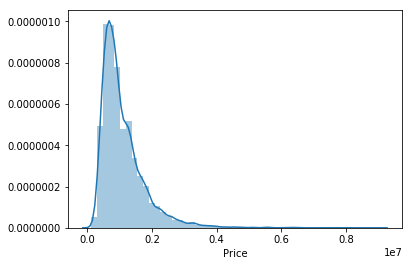

In [69]:
sns.distplot(data['Price'])

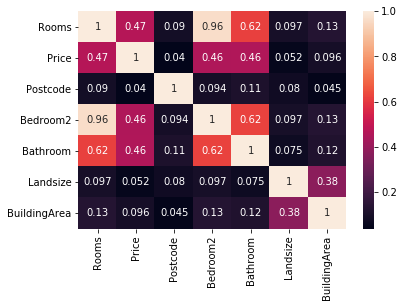

In [70]:
sns.heatmap(data.corr(),annot=True)

In [71]:
data.corr()

,Rooms,Price,Postcode,Bedroom2,Bathroom,Landsize,BuildingArea
Rooms,1.000000,0.469706,0.090439,0.964839,0.620627,0.096851,0.132228
Price,0.469706,1.000000,0.040313,0.455669,0.459014,0.051820,0.096032
Postcode,0.090439,0.040313,1.000000,0.094191,0.114236,0.079714,0.044853
Bedroom2,0.964839,0.455669,0.094191,1.000000,0.623088,0.096884,0.130595
Bathroom,0.620627,0.459014,0.114236,0.623088,1.000000,0.074670,0.122649
Landsize,0.096851,0.051820,0.079714,0.096884,0.074670,1.000000,0.375341
BuildingArea,0.132228,0.096032,0.044853,0.130595,0.122649,0.375341,1.000000


Greatest correlations are between:
* Price - Rooms
* Rooms - Bedroom2

Next correlations between: 
* Rooms - Bathroom
* Price - Bedroom2
* Price - Bathroom

In [72]:
X= data[['Bedroom2', 'Bathroom', 'Price']]

In [73]:
y=data['Rooms']

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
lm=LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

0.10282521963862212


In [76]:
lm.coef_

array([9.43849056e-01, 2.98666606e-02, 3.65960130e-08])

In [77]:
cdf=pd.DataFrame(lm.coef_,X.columns, columns=['coeff'])

In [78]:
cdf

,coeff
Bedroom2,9.438491e-01
Bathroom,2.986666e-02
Price,3.659601e-08


In [79]:
predictions=lm.predict(X_test)

In [80]:
predictions

array([3.07187224, 3.01181386, 2.07404406, ..., 2.03466244, 3.99957814,
       3.0153314 ])

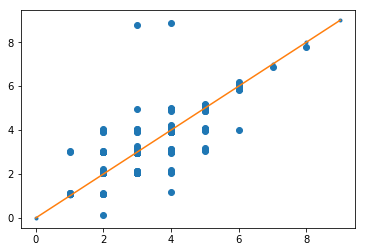

In [81]:
x = np.arange(10)
y = 1 * x + 0
b, m = polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.scatter(y_test, predictions)

In [82]:
# sns.distplot(y_test-predictions)

In [83]:
from sklearn import metrics

In [84]:
metrics.mean_absolute_error(y_test, predictions)

0.0849492182546023

In [85]:
metrics.mean_squared_error(y_test, predictions)

0.07233922862791856

In [86]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.2689595297213292

In [87]:
metrics.explained_variance_score(y_test, predictions)

0.920674546620244

In [116]:
#Cross validation
#R^2 value is basically dependent on the way the data is split.
reg=lm
cv_results=cross_val_score(reg,X,y,cv=5)
print(np.mean(cv_results))
print(np.std(cv_results))

0.19241352328445427
0.09679665578684482


##### As we can see that max correlation is between the Price, Romms and Bedroom2, we will use these three columns as pillars for the structure of the following models



In [89]:
X = data[["Rooms", "Bedroom2", "Bathroom"]]
y = data[["Price"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[22629.79356167] [[251761.40388044 -42640.28020508 257296.25840381]]


In [90]:
# import statsmodels.api as sm
# Swap X and y places
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                 1.227e+04
Date:                Wed, 07 Nov 2018   Prob (F-statistic):               0.00
Time:                        17:58:35   Log-Likelihood:            -1.3782e+05
No. Observations:                9382   AIC:                         2.756e+05
Df Residuals:                    9379   BIC:                         2.757e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rooms       2.557e+05   2.35e+04     10.867      0.000     2.1e+05    3.02e+05
Bedroom2   -4.046e+04   2.37e+04     -1.706      0.088   -8.69e+04    6022.009
Bathroom    2.584e+05   1.06e+04     24.416      0.000    2.38e+05    2.79e+05
==============================================================================
Omnibus:                     4754.358   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68043.911
Skew:                           2.085   Prob(JB):                         0.00
Kurtosis:                      15.517   Cond. No.                         27.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### We get our R-squared as 0.797. In the interest of getting a smaller value we will repeat the OLS Regression with different Independent and Dependent variables

In [91]:
#Predicting without splitting the dataset into test and train.
ypred=results.predict()
print(ypred)

[ 688855.22772424 1162496.89802429 1159737.89715027 ...  947283.3406001
  688855.22772424  688855.22772424]


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as sm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold

#Calculating the root mean squared error of the fit regression line based on independent variables 
rmseFull = np.sqrt(metrics.mean_squared_error(y, ypred))
print(rmseFull)

579901.2762707103


In [93]:
y_m=np.mean(y)
print(rmseFull/y_m)
# The mean squared error is divided with the mean to calculate the coefficient of variation between the actual and the residual
# values. It is just a root mean squared value which helps us to normalize the rsme around the mean

Price    0.529775
dtype: float64


In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.2569106552477268

In [95]:
#Finding and plotting correlations

X = data[["Rooms", "Bedroom2"]]
y = data[["Price"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

[69775.60936972] [[306208.49828782  25192.18752928]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 1.703e+04
Date:                Wed, 07 Nov 2018   Prob (F-statistic):               0.00
Time:                        17:58:39   Log-Likelihood:            -1.3811e+05
No. Observations:                9382   AIC:                         2.762e+05
Df Residuals:                    9380   BIC:                         2.762e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rooms       3.191e+05   2.41e+04     13.234      0.000    2.72e+05    3.66e+05
Bedroom2    3.292e+04   2.43e+04      1.357      0.175   -1.46e+04    8.05e+04
==============================================================================
Omnibus:                     4836.473   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66617.211
Skew:                           2.147   Prob(JB):                         0.00
Kurtosis:                      15.328   Cond. No.                         25.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### After reducing the dependent variables by 1 entry (Bathroom), we get a smaller R-squared value of 0.784

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [97]:
reg_all.score(X_test, y_test)

0.23246496253097615

In [98]:
X = data[["Rooms", "Bathroom"]]
y = data[["Price"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

# import statsmodels.api as sm
# Swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

[19617.38092176] [[211572.99654936 255050.8124261 ]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                 1.841e+04
Date:                Wed, 07 Nov 2018   Prob (F-statistic):               0.00
Time:                        17:58:40   Log-Likelihood:            -1.3782e+05
No. Observations:                9382   AIC:                         2.756e+05
Df Residuals:                    9380   BIC:                         2.757e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rooms       2.168e+05   5832.997     37.165      0.000    2.05e+05    2.28e+05
Bathroom    2.561e+05   1.05e+04     24.394      0.000    2.36e+05    2.77e+05
==============================================================================
Omnibus:                     4753.006   Durbin-Watson:                   1.402
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68051.136
Skew:                           2.084   Prob(JB):                         0.00
Kurtosis:                      15.518   Cond. No.                         7.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### After reducing the original OLS Regression Model dependent variables by 1 entry (Bedroom2), we get the same R-squared value of 0.797 as the orignial OLS. 

##### So, the best independant and dependant variables are Price & Rooms, Bedroom2 respectively.

In [99]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
pred_train=results.predict(X_train)
pred_test=results.predict(X_test)
print(results.score(X_test,y_test))
print(results.score(X_train,y_train))

#predicting the results of test and train data

0.23246496253097615
0.2152950494285666


In [100]:
X = data[["Rooms"]]
y = data[["Price"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

[71826.92832026] [[330571.06013157]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 3.406e+04
Date:                Wed, 07 Nov 2018   Prob (F-statistic):               0.00
Time:                        17:58:41   Log-Likelihood:            -1.3811e+05
No. Observations:                9382   AIC:                         2.762e+05
Df Residuals:                    9381   BIC:                         2.762e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rooms       3.517e+05   1905.864    184.556      0.000    3.48e+05    3.55e+05
==============================================================================
Omnibus:                     4835.809   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66643.351
Skew:                           2.147   Prob(JB):                         0.00
Kurtosis:                      15.331   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### After reducing the original OLS Regression Model dependent variables all but two entry (Rooms and Price), we get the same R-squared value of 0.784 as the best fit OLS. 

##### In this case its best, to go for the second OLS model as there are more variables that give the same (best) R-squared model.

In [101]:
#Calculating the root mean squared error of the fit regression line based on independent variables 
rmseFull = np.sqrt(metrics.mean_squared_error(y, ypred))
print(rmseFull)

579901.2762707103


In [102]:
y_m=np.mean(y)
print(rmseFull/y_m)
# The mean squared error is divided with the mean to calculate the coefficient of variation between the actual and the residual
# values. It is just a root mean squared value which helps us to normalize the rsme around the mean

Price    0.529775
dtype: float64


In [103]:
#Predicting the results of test and train data

model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
pred_train=results.predict(X_train)
pred_test=results.predict(X_test)
print(results.score(X_test,y_test))
print(results.score(X_train,y_train))

0.23246496253097615
0.2152950494285666


In [104]:
#Predicting testing set for Price column
print(pred_test)

[[ 733356.5631086 ]
 [ 733356.5631086 ]
 [1060914.99379771]
 ...
 [1066832.11851927]
 [ 405798.1324195 ]
 [1388473.42448682]]


In [105]:
#Predicting training set for Price column
print(pred_train)

[[1388473.42448682]
 [ 733356.5631086 ]
 [ 733356.5631086 ]
 ...
 [ 733356.5631086 ]
 [1388473.42448682]
 [1060914.99379771]]


In [106]:
rmsetrain = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
print(rmsetrain)
rmsetest = np.sqrt(metrics.mean_squared_error(y_test, pred_test))
print(rmsetest)
#Even the rmse's do not vary much

596436.5170225806
600726.4130020092


##### R^2 value is basically dependant on the way the data is split. Hence, there may be times when the R^2 value may not be able to represent the model's ability to generalize. For this we perform cross validation.

In [107]:
#Cross validation
reg=linear_model.LinearRegression()
cv_results=cross_val_score(reg,X,y,cv=4)
print(cv_results)
print(np.mean(cv_results))
print(np.std(cv_results))
#Using cross validation of score 5

[0.28898016 0.25525543 0.1105835  0.06344181]
0.17956522355921112
0.09479420033526818


In [108]:
#Regularization
#We perform regularization in order to alter the loss function to penalize it for having higher coefficients for each feature
# variable. And as we know, large coefficients leads to overfitting.

#Ridge Regularization
ridge = Ridge(alpha=0.1, normalize = True)
ridge.fit(X_train,y_train)
ridge_pred=ridge.predict(X_test)
ridge.score(X_test,y_test)
#The score is pretty much similar to the linear model built which ensures that the model has passed the Ridge regression test
# for regularization
#Ridge is used to penalize the loss function by adding the OLS loss function to the square of each coefficient multiplied by alpha.

0.23075319577845874

In [109]:
#Lasso Regularization
lasso=Lasso(alpha=.1)
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)

[330570.9520824]


###  Part B - Logistic model or regularization (30 points)

Your choice of either a logistic model or regularization.
- Generate a logistic model for your data:
    - Find a significant logistic linear model of your choosing in your data. Create a logistic linear model. (25 points)

Answer the following questions for the logistic linear model:
* Is the relationship significant?  
* Are any model assumptions violated?   
* Cross-validate the model. How well did it do?  

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#training and testing data for logistic regression

C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [111]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

10-fold cross validation average accuracy: 0.013


In [112]:
y_pred = logreg.predict(X_test)
print (y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

[1300000.  600000.  600000. ... 1300000.  600000. 1300000.]
Accuracy of logistic regression classifier on test set: 0.01


In [113]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

#Confusion matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
#Classification Report
target_names = ['Northern Metropolitan', 'Southern Metropolitan','Northeastern Metropolitan','Southeastern Metropolitan']
print(classification_report(y_test, y_pred, target_names=target_names))

#the final classification report